#    Forecasting ARIMA Model Cocacola Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
from pandas.plotting import lag_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings

In [2]:
cocacola = pd.read_excel("CocaCola_Sales_Rawdata.xlsx")
cocacola.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


###   Converting Q1,Q2,Q3,Q4 to dates

In [3]:
dates = pd.date_range(start='1986', periods=42, freq='Q')
dates

DatetimeIndex(['1986-03-31', '1986-06-30', '1986-09-30', '1986-12-31',
               '1987-03-31', '1987-06-30', '1987-09-30', '1987-12-31',
               '1988-03-31', '1988-06-30', '1988-09-30', '1988-12-31',
               '1989-03-31', '1989-06-30', '1989-09-30', '1989-12-31',
               '1990-03-31', '1990-06-30', '1990-09-30', '1990-12-31',
               '1991-03-31', '1991-06-30', '1991-09-30', '1991-12-31',
               '1992-03-31', '1992-06-30', '1992-09-30', '1992-12-31',
               '1993-03-31', '1993-06-30', '1993-09-30', '1993-12-31',
               '1994-03-31', '1994-06-30', '1994-09-30', '1994-12-31',
               '1995-03-31', '1995-06-30', '1995-09-30', '1995-12-31',
               '1996-03-31', '1996-06-30'],
              dtype='datetime64[ns]', freq='Q-DEC')

In [4]:
cocacola['date'] = pd.DataFrame(dates)
cocacola.head()

,Quarter,Sales,date
0,Q1_86,1734.827000,1986-03-31
1,Q2_86,2244.960999,1986-06-30
2,Q3_86,2533.804993,1986-09-30
3,Q4_86,2154.962997,1986-12-31
4,Q1_87,1547.818996,1987-03-31


In [5]:
coca_cola = cocacola.drop(["Quarter"],axis=1)     #  Dropping Quarter column
coca_cola = coca_cola[["date","Sales"]]           #  Rearrange the column names
coca_cola = coca_cola.set_index('date')           #  Setting date as header

In [6]:
coca_cola.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 42 entries, 1986-03-31 to 1996-06-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   42 non-null     float64
dtypes: float64(1)
memory usage: 672.0 bytes


##    Visualizing the Dataset

###    1) Line Plot

<AxesSubplot:xlabel='date'>

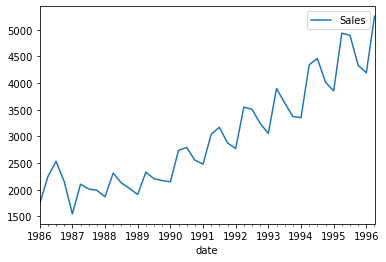

In [7]:
coca_cola.plot()

###    2) Histogram

array([[<AxesSubplot:title={'center':'Sales'}>]], dtype=object)

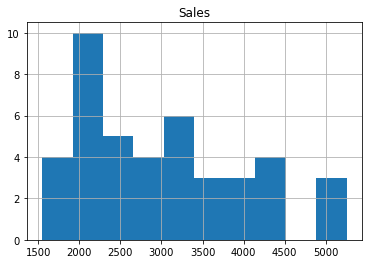

In [8]:
coca_cola.hist()

###    3) Density Plot

<AxesSubplot:ylabel='Density'>

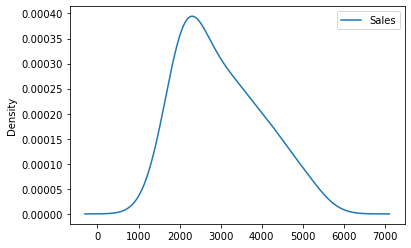

In [9]:
coca_cola.plot(kind='kde')

###    4) Lag Plot

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

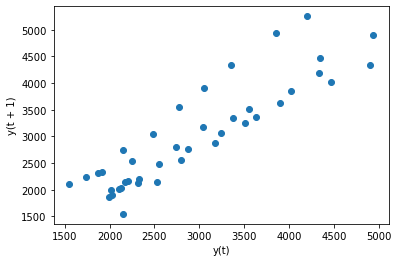

In [10]:
lag_plot(coca_cola)

###    5) Autocorrelation Plot

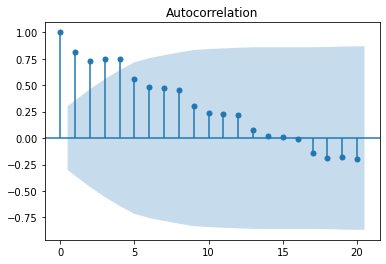

In [11]:
plot_acf(coca_cola,lags=20)
pyplot.show()

###    6) Partial Autocorrelation Plot

E:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


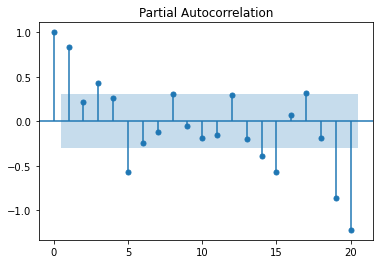

In [12]:
plot_pacf(coca_cola,lags=20)
pyplot.show()

##     Preprocessing

###    creating train and test dataset

In [13]:
split = len(coca_cola) - 6
Train, Test = coca_cola[0:split], coca_cola[split:]
print('Train %d, Test %d' % (len(Train), len(Test)))
Train.to_csv('Train.csv', header=False)
Test.to_csv('Test.csv', header=False) 

Train 36, Test 6


In [14]:
Train.head()

,Sales
date,
1986-03-31,1734.827000
1986-06-30,2244.960999
1986-09-30,2533.804993
1986-12-31,2154.962997
1987-03-31,1547.818996


In [15]:
Test.head()

,Sales
date,
1995-03-31,3854.0
1995-06-30,4936.0
1995-09-30,4895.0
1995-12-31,4333.0
1996-03-31,4194.0


##      Naive Forecasting - Base model/Persistence

In [16]:
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from math import sqrt

In [17]:
train = read_csv('Train.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
train_val = train.values
train_size = int(len(train_val) * 0.50)
train_base, test_base = train_val[0:train_size], train_val[train_size:] 

In [18]:
history = [x for x in train_base]
predictions = list()
for i in range(len(test_base)):
    pred = history[-1]
    predictions.append(pred)
    observation = test_base[i]
    history.append(observation)
    print('>Predicted=%.3f, Expected=%.3f' % (pred, observation))
rmse = sqrt(mean_squared_error(test_base, predictions))
print('RMSE: %.3f' % rmse) 

>Predicted=2739.308, Expected=2792.754
>Predicted=2792.754, Expected=2556.010
>Predicted=2556.010, Expected=2480.974
>Predicted=2480.974, Expected=3039.523
>Predicted=3039.523, Expected=3172.116
>Predicted=3172.116, Expected=2879.001
>Predicted=2879.001, Expected=2772.000
>Predicted=2772.000, Expected=3550.000
>Predicted=3550.000, Expected=3508.000
>Predicted=3508.000, Expected=3243.860
>Predicted=3243.860, Expected=3056.000
>Predicted=3056.000, Expected=3899.000
>Predicted=3899.000, Expected=3629.000
>Predicted=3629.000, Expected=3373.000
>Predicted=3373.000, Expected=3352.000
>Predicted=3352.000, Expected=4342.000
>Predicted=4342.000, Expected=4461.000
>Predicted=4461.000, Expected=4017.000
RMSE: 424.558


##       ARIMA Model

In [19]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [20]:
def arima_model(train_val, arima_order):
    train_size = int(len(train_val) * 0.50)
    train, test = train_val[0:train_size], train_val[train_size:]
    history = [x for x in train]
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse  

In [21]:
def evaluate_models(Train, p_val, d_val, q_val):
    best_score, best_cfg = float('inf'), None
    for p in p_val:
        for d in d_val:
            for q in q_val:
                order = (p,d,q)
                try:
                    rmse = arima_model(train, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))  

In [22]:
train = read_csv('Train.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
p_val = range(0, 5)
d_val = range(0, 5)
q_val = range(0, 5)
warnings.filterwarnings("ignore")
evaluate_models(train.values, p_val, d_val, q_val)   

ARIMA(0, 0, 0) RMSE=1044.237
ARIMA(0, 0, 1) RMSE=729.226
ARIMA(0, 0, 2) RMSE=432.562
ARIMA(0, 0, 3) RMSE=621.979
ARIMA(0, 1, 0) RMSE=426.375
ARIMA(0, 1, 1) RMSE=422.017
ARIMA(0, 1, 2) RMSE=383.258
ARIMA(0, 1, 3) RMSE=350.608
ARIMA(0, 1, 4) RMSE=263.567
ARIMA(0, 2, 0) RMSE=641.903
ARIMA(0, 2, 1) RMSE=448.829
ARIMA(0, 2, 2) RMSE=409.138
ARIMA(0, 2, 3) RMSE=388.884
ARIMA(1, 0, 0) RMSE=501.454
ARIMA(1, 1, 0) RMSE=426.762
ARIMA(1, 1, 1) RMSE=406.006
ARIMA(1, 2, 0) RMSE=635.084
ARIMA(2, 0, 0) RMSE=518.844
ARIMA(2, 1, 0) RMSE=328.366
ARIMA(2, 1, 1) RMSE=338.351
ARIMA(2, 2, 0) RMSE=533.966
ARIMA(3, 0, 0) RMSE=436.086
ARIMA(3, 1, 0) RMSE=261.947
ARIMA(3, 2, 0) RMSE=191.209
ARIMA(4, 0, 0) RMSE=379.062
ARIMA(4, 1, 0) RMSE=188.437
ARIMA(4, 2, 0) RMSE=195.582
Best ARIMA(4, 1, 0) RMSE=188.437


###   Building model using optimised value on train and test dataset

In [23]:
train = read_csv('Train.csv', header=None, index_col=0, parse_dates=True,squeeze=True)
train_val = train.values

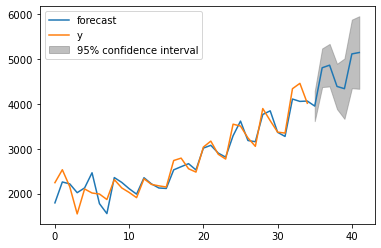

In [24]:
model = ARIMA(train_val, order=(4,1,0))
model_fit = model.fit()
forecast = model_fit.forecast(steps=6)[0]
model_fit.plot_predict(1,42) 
pyplot.show()

In [25]:
forecast

array([3953.75496553, 4809.31308191, 4866.80634055, 4392.2221544 ,
       4342.25015242, 5118.08980638])

In [26]:
val=pd.read_csv('Test.csv',header=None)
rmse = sqrt(mean_squared_error(val[1], forecast))
rmse 

108.38330314291633

###     Building Final Model  using original dataset

In [27]:
coca_cola.head()

,Sales
date,
1986-03-31,1734.827000
1986-06-30,2244.960999
1986-09-30,2533.804993
1986-12-31,2154.962997
1987-03-31,1547.818996


In [28]:
coca_cola_val = coca_cola.values

In [29]:
model = ARIMA(coca_cola_val, order=(4,1,0))
model_fit = model.fit() 

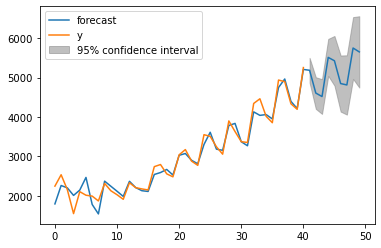

In [30]:
forecast=model_fit.forecast(steps=14)[0]
model_fit.plot_predict(1,50) 
pyplot.show()

In [31]:
forecast 

array([5183.65041287, 4605.84958975, 4517.98286236, 5510.79261837,
       5425.02095612, 4847.14788446, 4811.66441693, 5748.4763111 ,
       5649.67446926, 5079.55973695, 5093.08074784, 5979.40540529,
       5868.3397893 , 5310.6588947 ])

###  Thus using ARIMA model, forecasted dataset for the next three and half years 